### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [113]:
import pandas as pd
import seaborn as sns

In [114]:
cars = pd.read_csv('vehicle.csv')

In [115]:
cars.dropna(inplace=True)

In [116]:
cars.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [117]:
cars.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

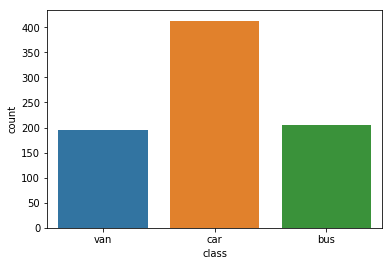

In [118]:
sns.countplot(x='class', data=cars)

### Check for any missing values in the data 

In [119]:
cars.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [120]:
from scipy.stats import zscore

for feature in cars.columns: # Changing all object columns with int
    if cars[feature].dtype == 'object': 
        cars[feature] = pd.Categorical(cars[feature]).codes # Replace strings with an integer
        
cars.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


In [121]:
data = cars.apply(zscore)
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,1.443415
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,1.443415
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,0.017538
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,1.443415
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,-1.408339


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [122]:
X_scaled = data.drop('class', axis=1)
X_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [123]:
from sklearn.cluster import KMeans  

import matplotlib.pyplot as plt   
from sklearn import metrics
import numpy as np

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [124]:
# KMeans Clustring Algorithm
# Label, Intertia and Centroid
cluster_range = range( 1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init=4)
  clusters.fit(X_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.201327
4,5,5192.924772
5,6,4718.986207
6,7,4355.139334
7,8,4130.682081
8,9,3900.382722


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

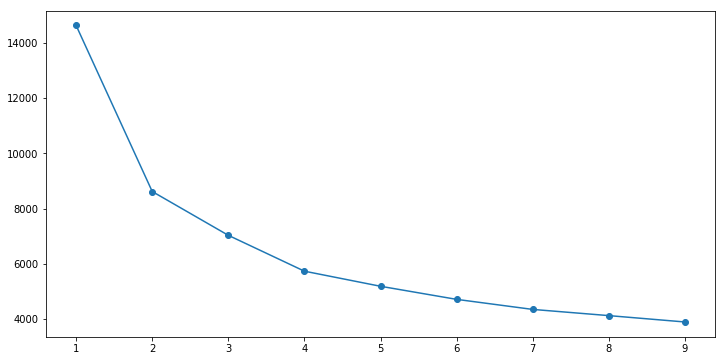

In [125]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [126]:
'''Looking at the error plot seems the K as  3 or 4 can be taken as optimal value '''

'Looking at the error plot seems the K as  3 or 4 can be taken as optimal value '

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [127]:
# Number of clusters

kmeans = KMeans(n_clusters=3)

# Fitting the input data

kmeans = kmeans.fit(X_scaled)

# Getting the cluster labels

labels = kmeans.predict(X_scaled)

# Centroid values

centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")

print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.91987072 -0.52009251 -0.89320752 -1.06435572 -0.50042171 -0.2190738
  -0.7791213   0.86589322 -0.74535635 -0.484632   -0.78240328 -0.78341064
  -0.38498232  0.83878747 -0.09524349 -0.30171562 -1.05420601 -1.11069466]
 [ 1.13076532  1.17094237  1.19500584  1.01909505  0.21505188  0.34250798
   1.27180461 -1.19061224  1.27548416  1.09266768  1.22038121  1.28132727
   1.07954232 -0.02879497  0.16229031  0.26566456 -0.00535553  0.18380067]
 [-0.2339617  -0.57387481 -0.30776905 -0.03041322  0.2050726  -0.11653151
  -0.45904181  0.32506329 -0.48798836 -0.53604446 -0.41380935 -0.46366305
  -0.60155031 -0.61924057 -0.06177969  0.01066762  0.81278556  0.69897299]]


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [128]:
centroids.dtype

dtype('float64')

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [129]:
centroid_df = pd.DataFrame(centroids, columns = list(X_scaled) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [130]:
X_df = pd.DataFrame(X_scaled)
X_df["group"] = labels
X_df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,group
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,2
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,2
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,1
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,2
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,0
6,0.406283,-0.293543,-0.573312,0.116137,0.404751,-0.556023,-0.470734,0.129648,-0.606014,-0.337462,-0.397397,-0.441776,-0.069700,-0.856567,1.351690,-1.310052,1.792048,1.118521,2
7,-0.444400,-0.293543,-1.017098,-0.360128,0.404751,0.085785,-0.954676,0.899019,-0.994877,-0.130505,-0.846883,-0.898494,-0.317284,-0.722724,-0.681472,-1.085874,0.653818,0.848040,2
8,-0.930504,-1.758654,-1.270690,-0.866160,-0.097251,-0.342087,-1.408372,1.668390,-1.383740,-1.441236,-1.521112,-1.229615,-1.926579,-1.124255,-0.884788,0.147109,1.792048,1.659484,2
10,-0.930504,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040,2
11,-0.444400,-1.758654,-1.017098,-0.985226,-0.850254,-0.556023,-1.378125,1.668390,-1.383740,-2.062109,-1.296369,-1.223906,-1.740891,-0.990411,-0.274839,1.492180,1.141631,0.848040,2


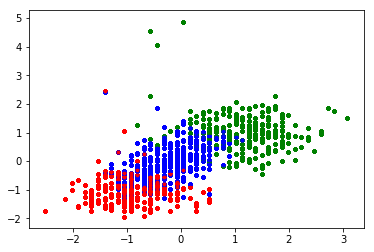

In [147]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        ax.scatter(points[:, 0], points[:, 3], s=7, c=colors[i])

'''With values of k from 3 , 4 and 5 doest give a clear seperation of clusters but overlapping of clusters
With k as 2 we do get almost some clear seperation of clusters but with higher errors'''

In [135]:
X_scaled["group"].value_counts()

2    313
1    260
0    240
Name: group, dtype: int64

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [149]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [173]:
data = np.vstack((a,b,c))

In [177]:
data_df = pd.DataFrame(data=data)
data_df.head()

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

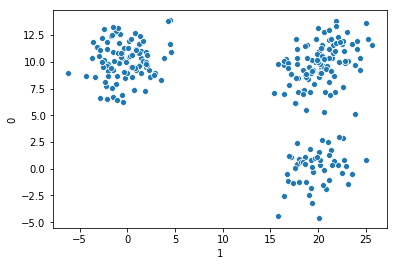

In [179]:
sns.scatterplot(x=data_df[1], y=data_df[0])

In [180]:
X=data_df

In [188]:
from sklearn import metrics
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [189]:
# Case 1: Ward Method
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z , pdist(X))
print("Ward",c)

Ward 0.9536963071171022


### 12. Plot the dendrogram for the consolidated dataframe

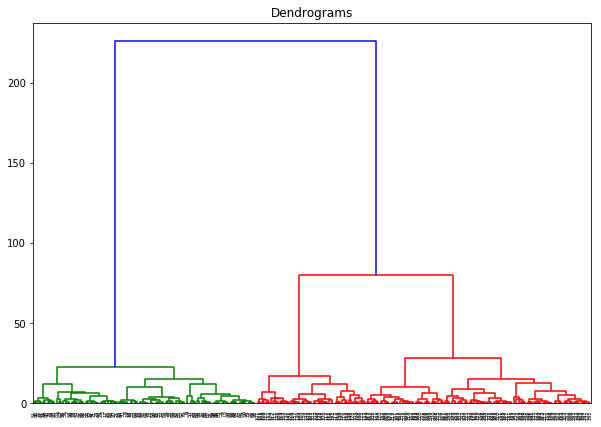

In [191]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

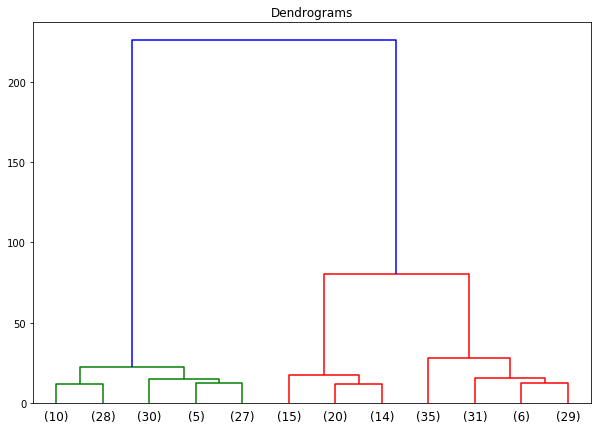

In [193]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='lastp', p=12)

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [194]:
from scipy.cluster.hierarchy import fcluster
max_d = 12
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 3,  2,  4,  1,  1,  4,  4,  1,  2,  3,  2,  1,  1,  2,  2,  2,  4,
        1,  2,  2,  1,  1,  2,  1,  3,  1,  4,  2,  1,  1,  2,  1,  2,  2,
        1,  4,  1,  4,  2,  1,  1,  1,  2,  1,  4,  1,  4,  1,  1,  4,  3,
        1,  4,  1,  1,  2,  1,  2,  2,  4,  4,  2,  1,  2,  2,  4,  2,  4,
        4,  2,  2,  1,  4,  2,  1,  1,  2,  4,  1,  4,  2,  1,  4,  1,  4,
        1,  2,  4,  4,  3,  1,  4,  2,  2,  1,  1,  4,  1,  4,  4,  6,  5,
        6,  6,  5,  6,  5,  6,  5,  6,  6,  5,  5,  6,  5,  6,  6,  6,  6,
        6,  6,  5,  6,  6,  5,  6,  6,  5,  5,  6,  6,  6,  5,  6,  6,  5,
        6,  6,  6,  6,  6,  5,  6,  6,  6,  6,  6,  9,  5,  6,  8,  7,  7,
       10,  8, 10,  8,  7, 10, 10, 10,  8,  7,  8,  8,  7,  9, 10,  7,  8,
        7,  7, 10,  7, 10,  8,  7,  8,  7, 10, 10,  8,  7, 10, 10,  8, 10,
        8,  8,  8,  7, 10, 10,  7,  7,  8,  9,  8,  8,  7,  7,  7,  8,  9,
       10,  7,  7,  8,  8,  7,  8,  8, 10, 10,  7, 10,  8,  7,  7,  7,  7,
        7,  8, 10, 10,  8

### Use matplotlib to visually observe the clusters in 2D space 